# Imports


In [983]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.preprocessing import sequence
from tensorflow.python.keras import Sequential
from keras.models import load_model
from tensorflow.python.keras.layers import Dense, Embedding, GlobalAveragePooling1D,GlobalAveragePooling2D,GlobalAveragePooling3D

import pickle

from keras import preprocessing
import keras
from keras.utils import pad_sequences

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

In [984]:
df = pd.read_csv(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\neural_network_data.csv')

In [985]:
df['rating'] = df['rating'].fillna((df['rating'].mean()))
df['rating'] = df['rating'].astype(np.int64)
df['review'] = df['review'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16511 entries, 0 to 16510
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  16511 non-null  int64 
 1   review  16511 non-null  object
dtypes: int64(1), object(1)
memory usage: 258.1+ KB


In [986]:
df.head()

,rating,review
0,1,Its hard to find words that can describe this ...
1,1,"Absolutely terrible. Cracked ceiling, tiny roo..."
2,1,Very disappointed firstly i checked in online ...
3,1,First of all we arrived wanting to park at the...
4,1,"Hello, I currently staying @ Hilton Metropole..."


# One Hot Encoding Scores Column

Veri setimiz model kurmaya uygun olmadığından ve 1 ila 5 arasında puan çıktısına sahip olmak açısından one hot encoding uygulamak istedim.

In [987]:
enc = OneHotEncoder(handle_unknown='ignore')

enc_df = pd.DataFrame(enc.fit_transform(df[['rating']]).toarray())

df = df.join(enc_df)
df = df.rename(columns={0: "rating_1", 1:'rating_2',2:'rating_3',3:'rating_4',4:'rating_5'})
df.head()

,rating,review,rating_1,rating_2,rating_3,rating_4,rating_5
0,1,Its hard to find words that can describe this ...,1.0,0.0,0.0,0.0,0.0
1,1,"Absolutely terrible. Cracked ceiling, tiny roo...",1.0,0.0,0.0,0.0,0.0
2,1,Very disappointed firstly i checked in online ...,1.0,0.0,0.0,0.0,0.0
3,1,First of all we arrived wanting to park at the...,1.0,0.0,0.0,0.0,0.0
4,1,"Hello, I currently staying @ Hilton Metropole...",1.0,0.0,0.0,0.0,0.0


In [988]:
df.head()

,rating,review,rating_1,rating_2,rating_3,rating_4,rating_5
0,1,Its hard to find words that can describe this ...,1.0,0.0,0.0,0.0,0.0
1,1,"Absolutely terrible. Cracked ceiling, tiny roo...",1.0,0.0,0.0,0.0,0.0
2,1,Very disappointed firstly i checked in online ...,1.0,0.0,0.0,0.0,0.0
3,1,First of all we arrived wanting to park at the...,1.0,0.0,0.0,0.0,0.0
4,1,"Hello, I currently staying @ Hilton Metropole...",1.0,0.0,0.0,0.0,0.0


In [989]:
df.shape

(16511, 7)

# Train - Test Split

#   Noktalama işaretlerini Kaldırılması ve Tokanization Yapılması

In [990]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z]+')

def text_cleanup(text):

    token_list = tokenizer.tokenize(text.lower())
    new_text = ''
    for word in token_list:
        new_text += word + ' '

    return new_text

In [991]:
df['review_cleaned'] = df['review'].apply(text_cleanup)

In [992]:
review_index = 2000
print('REVİEW:', df['review'].iloc[review_index],)
print('REVİEW_CLEANED', df['review_cleaned'].iloc[review_index])

REVİEW: Paid £120 for a room for 10 hours occupation pre flight . We expected a comfortable bed, decent room and facilities.  Its the worst bed we have ever had the occasion to sleep in except we did not sleep at all.  The mattress was so lumpy. The matress did not fit on the  box frame and every time you got out of the bed you banged your legs, resulting in bruises. No drinks facility in the room. Should be internet access in room and not have go into the lobby. Never again at this hotel. Its totally put us off staying at any other Hilton hotels.
REVİEW_CLEANED paid for a room for hours occupation pre flight we expected a comfortable bed decent room and facilities its the worst bed we have ever had the occasion to sleep in except we did not sleep at all the mattress was so lumpy the matress did not fit on the box frame and every time you got out of the bed you banged your legs resulting in bruises no drinks facility in the room should be internet access in room and not have go into th

In [993]:
df.head()

,rating,review,rating_1,rating_2,rating_3,rating_4,rating_5,review_cleaned
0,1,Its hard to find words that can describe this ...,1.0,0.0,0.0,0.0,0.0,its hard to find words that can describe this ...
1,1,"Absolutely terrible. Cracked ceiling, tiny roo...",1.0,0.0,0.0,0.0,0.0,absolutely terrible cracked ceiling tiny room ...
2,1,Very disappointed firstly i checked in online ...,1.0,0.0,0.0,0.0,0.0,very disappointed firstly i checked in online ...
3,1,First of all we arrived wanting to park at the...,1.0,0.0,0.0,0.0,0.0,first of all we arrived wanting to park at the...
4,1,"Hello, I currently staying @ Hilton Metropole...",1.0,0.0,0.0,0.0,0.0,hello i currently staying hilton metropole in ...


<AxesSubplot:>

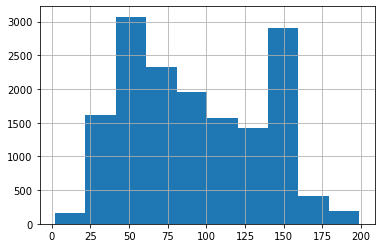

In [994]:
df['count'] = df['review_cleaned'].str.count(' ') + 1
indexNames = df[df['count'] >= 200 ].index
df.drop(indexNames , inplace=True)
df['count'].hist()

In [995]:
x_train, x_test, y_train, y_test = train_test_split(df[['review_cleaned']],
                                                    df[['rating_1','rating_2','rating_3','rating_4','rating_5']],
                                                    test_size=.2,
                                                    random_state=42)

# Her bir kelimenin flat şekilde ayrılması

In [996]:
flat_review = " ".join(x_train['review_cleaned'].values)
flat_review = flat_review.lower().split()

In [997]:
#flat_review

In [998]:
len(flat_review)

1147541

Aynı kelimelerin tamamen kaldırıp uniqe bir veri oluşturulması

In [999]:
unique_list = []
for word in flat_review:
    if word not in unique_list:
        unique_list.append(word)

In [1000]:
len(unique_list)

26399

In [1001]:
word_index_dict = {}
for i in range(0,len(unique_list)):
    word_index_dict[unique_list[i]] = i

In [1002]:
 #word_index_dict

In [1003]:
#word_index_dict.items()

In [1004]:
word_index_dict = {k:(v+4) for k,v in word_index_dict.items()}
word_index_dict['<PAD>'] = 0
word_index_dict['<START>'] = 1
word_index_dict['<UNK>'] = 2  #Unkown Words
word_index_dict['<UNUSED>'] = 3

In [1005]:
len(word_index_dict)

26403

# Indexing Words in Reviews Using Dictionary

In [1006]:
def index_review_words(text):
    review_word_list = []
    for word in text.lower().split():
        if word in word_index_dict.keys():
            review_word_list.append(word_index_dict[word])
        else:
            review_word_list.append(word_index_dict['<UNK>'])

    return review_word_list

In [1007]:
x_train['preprocessed_review'] = x_train['review_cleaned'].apply(index_review_words)
x_test['preprocessed_review'] = x_test['review_cleaned'].apply(index_review_words)

In [1008]:
x_train.head()

,review_cleaned,preprocessed_review
13814,satisfied visit sydney travel agent recommende...,"[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,..."
1945,the good thing about the hotel is the location...,"[79, 80, 81, 82, 79, 39, 83, 79, 36, 84, 85, 8..."
10452,disappointment stayed worst room hotel view in...,"[152, 130, 23, 30, 39, 32, 153, 154, 155, 156,..."
11423,american stay away just got amsterdam loved st...,"[176, 144, 177, 178, 57, 179, 180, 144, 181, 3..."
4790,overall the room wasn t clean rusty bath stain...,"[142, 79, 30, 209, 188, 97, 210, 211, 212, 101..."


In [1009]:
x_train['preprocessed_review'].describe()

count       12497
unique      12495
top       [19339]
freq            2
Name: preprocessed_review, dtype: object

In [1010]:
x_train['preprocessed_review'].shape

(12497,)

In [1011]:
from keras_preprocessing.sequence import pad_sequences

x_train = pad_sequences(x_train['preprocessed_review'],value=word_index_dict['<PAD>'],padding='post',maxlen=200)  #value=0
x_test = pad_sequences(x_test['preprocessed_review'],value=word_index_dict['<PAD>'],padding='post',maxlen=200)

In [1012]:
x_train.shape

(12497, 200)

# Creating Neural Network Model

In [1013]:
np.save(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Neural_Networks\x_test',x_test)

In [1014]:
y_train.shape

(12497, 5)

In [1015]:
x_test.shape

(3125, 200)

In [1016]:
y_test.shape

(3125, 5)

In [1017]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=.4,random_state=42)

In [1110]:
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.python.keras.layers import AveragePooling1D
##
unique_list_len = len(word_index_dict) + 4
##kernel_regularizer=regularizers.l2(0.03),
##
model = keras.Sequential([
    Embedding(unique_list_len, 256),
    GlobalAveragePooling1D(),
    layers.Dropout(0.1),
    layers.Dense(8,
                 activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(8,
                 activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(5,activation="softmax"),
])
optimizer= tf.keras.optimizers.Adam(
        learning_rate=0.9,
)
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(
    x_train, y_train,
    epochs=16,
    batch_size=250,
    validation_data=(x_val,y_val))

Epoch 1/16
30/30 [==============================] - 3s 96ms/step - loss: 1.6067 - accuracy: 0.2210 - val_loss: 1.5977 - val_accuracy: 0.2949
Epoch 2/16
30/30 [==============================] - 2s 81ms/step - loss: 1.5893 - accuracy: 0.2623 - val_loss: 1.5677 - val_accuracy: 0.3463
Epoch 3/16
30/30 [==============================] - 2s 80ms/step - loss: 1.5454 - accuracy: 0.3035 - val_loss: 1.4995 - val_accuracy: 0.3709
Epoch 4/16
30/30 [==============================] - 3s 86ms/step - loss: 1.4686 - accuracy: 0.3377 - val_loss: 1.3968 - val_accuracy: 0.4511
Epoch 5/16
30/30 [==============================] - 3s 85ms/step - loss: 1.3729 - accuracy: 0.3820 - val_loss: 1.2917 - val_accuracy: 0.4627
Epoch 6/16
30/30 [==============================] - 2s 81ms/step - loss: 1.2878 - accuracy: 0.3997 - val_loss: 1.2200 - val_accuracy: 0.4789
Epoch 7/16
30/30 [==============================] - 2s 79ms/step - loss: 1.2275 - accuracy: 0.4280 - val_loss: 1.1677 - val_accuracy: 0.5161
Epoch 8/16
30

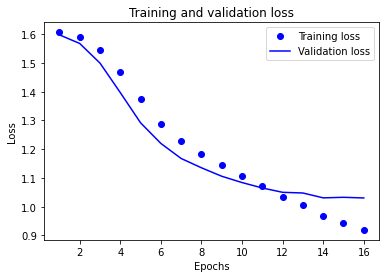

In [1111]:
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt
history_dict = history.history

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

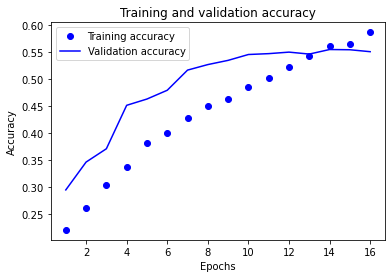

In [1112]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Test Confusion Matrix

Reverse Encode Target Into One Column for Confusion Matrix

In [1113]:
def reverse_encode(y_df):

    y_df['score'] = (y_df.iloc[:, 0:] == 1).idxmax(1)['score'] = (y_df.iloc[:, 0:] == 1).idxmax(1)
    for i in range(0,len(y_df)):
        if y_df.iloc[i,-1] == 'score_1':
            y_df.iloc[i,-1] = 1
        elif y_df.iloc[i,-1] == 'score_2':
            y_df.iloc[i,-1] = 2
        elif y_df.iloc[i,-1]== 'score_3':
            y_df.iloc[i,-1] = 3
        elif y_df.iloc[i,-1]== 'score_4':
            y_df.iloc[i,-1] = 4
        elif y_df.iloc[i,-1] == 'score_5':
            y_df.iloc[i,-1]= 5

In [1114]:
yy_test = y_test
#yy_val = y_val

reverse_encode(yy_test)
#reverse_encode(yy_val)

In [1115]:
def add_one_argmax_score(x):

    x = x+1

    return x

In [1116]:
yy_test_predicted = add_one_argmax_score(np.argmax(model.predict(x_test),axis=1))

98/98 [==============================] - 0s 2ms/step


 Saving Neural Network Preprocessed y Data

In [1117]:
yy_test.to_csv(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Neural_Networks/y_test_nn_df_5labels.csv',index=False)
np.save(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Neural_Networks/y_test_predicted_array_5labels',yy_test_predicted)

In [1118]:
yy_test['score'] = yy_test['score'].replace(['rating_1'],1)
yy_test['score'] = yy_test['score'].replace(['rating_2'],2)
yy_test['score'] = yy_test['score'].replace(['rating_3'],3)
yy_test['score'] = yy_test['score'].replace(['rating_4'],4)
yy_test['score'] = yy_test['score'].replace(['rating_5'],5)

In [1119]:
yy_test['score'] = yy_test['score'].astype(np.int64)

In [1120]:
def conf_matrix(cm):

    plt.figure(figsize=(9,9))
    ax = sns.heatmap(cm,
                     annot= True,
                     fmt = '.4g',
                     cbar=0,
                     xticklabels=[1,2,3,4,5],
                     yticklabels=[1,2,3,4,5])

    plt.show()

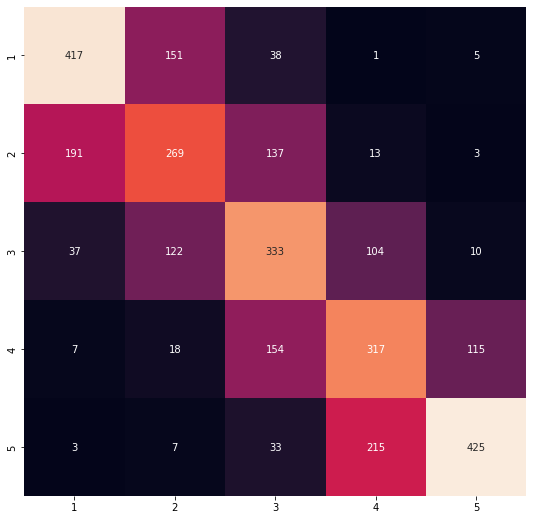

In [1121]:
test_cm = confusion_matrix(yy_test['score'], yy_test_predicted)
conf_matrix(test_cm)

In [1122]:
from sklearn.metrics import classification_report

print(classification_report(yy_test_predicted, yy_test['score']))

              precision    recall  f1-score   support

           1       0.68      0.64      0.66       655
           2       0.44      0.47      0.46       567
           3       0.55      0.48      0.51       695
           4       0.52      0.49      0.50       650
           5       0.62      0.76      0.68       558

    accuracy                           0.56      3125
   macro avg       0.56      0.57      0.56      3125
weighted avg       0.56      0.56      0.56      3125



# Saving Model for streamlit

In [1125]:
model.save(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Neural_Networks/Models/Neural_Network.h5py')

INFO:tensorflow:Assets written to: C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Neural_Networks/Models/Neural_Network.h5py\assets


INFO:tensorflow:Assets written to: C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Neural_Networks/Models/Neural_Network.h5py\assets


In [1126]:
pickle.dump(word_index_dict,open(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Neural_Networks/Models/word_index_dict.pkl','wb'))